<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cost (Loss) Functions**

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print(tf.__version__)

2.3.0


### **Introduction**

##### **Introduction**

**Really good intro by Brandon Rohrer**: https://youtu.be/fr7dfyfB7mI

Cost, loss, risk or error function

Properties of ideal Cost functions:

* smooth, 
* continuous, 
* symmetric (but i.e. Non-symmetric losses: e.g., for spam classification)
* differentials

https://en.m.wikipedia.org/wiki/Loss_function

https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

Complete list of [Loss / Cost Functions in TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

https://stackoverflow.com/questions/45648351/what-is-difference-between-loss-function-and-rmse-in-machine-learning

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#kullback-leibler

https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f

http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote10.html

**Overview: Similarity Learning & Distance Metric Learning**

* Ähnlichkeitsmaße werden für nominal oder ordinal skalierte Variablen genutzt

* Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.

https://en.m.wikipedia.org/wiki/Similarity_learning

https://en.m.wikipedia.org/wiki/Distance

https://cs.gmu.edu/~carlotta/teaching/CS775-s10/readings/LearningMetrics.pdf

**Similarity learning** is closely related to distance metric learning. Metric learning is the task of learning a distance function over objects. A metric or distance function has to obey four axioms: non-negativity, identity of indiscernibles, symmetry and subadditivity (or the triangle inequality). **In practice, metric learning algorithms ignore the condition of identity of indiscernibles and learn a pseudo-metric.**



https://en.m.wikipedia.org/wiki/Similarity_learning#Metric_learning

**Similarity Measure** In statistics and related fields, a similarity measure or similarity function is a real-valued function that quantifies the similarity between two objects.

Although no single definition of a similarity measure exists, usually such measures are in some sense the inverse of distance metrics: they take on large values for similar objects and either zero or a negative value for very dissimilar objects.

Cosine similarity is a commonly used similarity measure for real-valued vectors, used in (among other fields) information retrieval to score the similarity of documents in the vector space model. In machine learning, common kernel functions such as the RBF kernel can be viewed as similarity functions.

https://en.m.wikipedia.org/wiki/Similarity_measure

**Distance Metric Learning & Distance Measures**

Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.
https://cs.gmu.edu/~carlotta/teaching/CS775-s10/readings/LearningMetrics.pdf

##### **Similarity Learning & Similarity Measures**

*Ähnlichkeitsmaße werden für nominal oder ordinal skalierte Variablen genutzt*

**Overview**

In der Statistik, insbesondere der Multivariaten Statistik, interessiert man sich für die Messung der Ähnlichkeit zwischen verschiedenen Objekten und definiert dazu Ähnlichkeits- und Distanzmaße. **Es handelt sich dabei nicht um Maße im mathematischen Sinn**, der Begriff bezieht sich ausschließlich auf die Messung einer bestimmten Größe.

https://de.m.wikipedia.org/wiki/Ähnlichkeitsanalyse

https://de.m.wikipedia.org/wiki/Distanzfunktion

https://en.m.wikipedia.org/wiki/Distance_(graph_theory)

https://en.m.wikipedia.org/wiki/Distance

**Jaccard-Koeffizient**

https://de.m.wikipedia.org/wiki/Jaccard-Koeffizient

**Yules Index**

Yules Index ist ein statistischer Messwert, der die Uniformität oder Diversität des Wortschatzes bestimmt. Er wurde vom schottischen Statistiker George Udny Yule entwickelt und misst die Wahrscheinlichkeit, mit der zwei zufällig ausgewählte Wörter eines Textes identisch sind – und zwar weitgehend unabhängig vom Umfang des Textes.Diesen Index hat Herdan aufgegriffen und weiterentwickelt.

https://de.m.wikipedia.org/wiki/Yules_Index

**Pearson Korrelationskoeffizient**

https://de.m.wikipedia.org/wiki/Korrelationskoeffizient

##### **Distance Metric Learning & Distance Measures (& Divergence)**

*Distanzmaße werden für metrisch skalierte Variablen (d. h. für Intervall- und Verhältnisskala) genutzt.*

**Overview**

**Exkurs**: [Distance measures](https://en.m.wikipedia.org/wiki/Distance_measures_(cosmology)) in cosmology are complicated by the [expansion of the universe](https://en.m.wikipedia.org/wiki/Expansion_of_the_universe), and by effects described by the [theory of relativity](https://en.m.wikipedia.org/wiki/Theory_of_relativity) such as [length contraction](https://en.m.wikipedia.org/wiki/Length_contraction) of moving objects.

**Properties of a Divergence, Distance & Metric**

1. $d(x, y) \geq 0 \quad$ (**non-negativity**)

2. $d(x, y)=0$ if and only if $x=y$ (**identity of indiscernibles**. Note that condition 1 and 2 together produce **positive definiteness**)

3. $d(x, y)=d(y, x)$ (**symmetry**)

4. $d(x, z) \leq d(x, y)+d(y, z)$ (**subadditivity / triangle inequality**).

* **Divergence** fullfills property of positive definiteness (1 + 2)

* **Distance** fullfills property of positive definiteness and symmetrie (1 + 2+ 3)

* **Metric** fullfills property of positive definiteness, symmetrie and triangle inequality (1 + 2 + 3 + 4)

* Metric Space: Together with the set, a metric makes up a metric space.

* (*Jede Norm induziert eine Metrik, aber nicht jede Metrik wird durch eine Norm induziert*)

**Distance function vs. Distance Metric**

• Distance Metric:
▫ Satisfy non-negativity, symmetry and triangle
inequation

• Distance Function:
▫ May not satisfy one or more requirements for
distance metric
▫ More general than distance metric

https://www.cs.utexas.edu/~grauman/courses/spring2008/slides/Learning_distance_functions.pdf

**Divergence & 'Statistical Distance'**

In statistics and information geometry, divergence or a contrast function is a function which establishes the **"distance" of one probability distribution to the other** on a statistical manifold. In statistics, probability theory, and information theory, **a statistical distance** quantifies the distance between two statistical objects, which can be

* two random variables, or 
* two probability distributions or 
* two samples, or 
* the distance can be between an individual sample point and a population or 
* a wider sample of points.

A distance between populations can be interpreted as **measuring the distance between two probability distributions** and hence they are essentially measures of distances between probability measures. 

* Where statistical distance measures relate to the differences between random variables, these may have statistical dependence, and hence these distances are not directly related to measures of distances between probability measures. 

* Again, a measure of distance between random variables may **relate to the extent of dependence between them, rather than to their individual values.**

**<u>Many statistical distances are not metrics</u>** (and some types are regerred to as divergence), because they lack one or more properties of proper metrics. For example, 

* [pseudometrics](https://en.m.wikipedia.org/wiki/Pseudometric_space) violate the "positive definiteness" (alternatively, "identity of indescernibles") property (1 & 2 above); 

* [quasimetrics](https://en.m.wikipedia.org/wiki/Metric_(mathematics)#Quasimetrics) violate the symmetry property (3); and semimetrics violate the triangle inequality (4). 

* Statistical distances that satisfy (1) and (2) are referred to as divergences.

* In statistics and information geometry, there are many kinds of statistical distances, notably divergences, especially Bregman divergences and f-divergences. These include and generalize many of the notions of "difference between two probability distributions", and allow them to be studied geometrically, as statistical manifolds. 

* The **most elementary** is the **squared Euclidean distance**, which forms the basis of least squares; this is the most basic Bregman divergence (-> is this a metric then ???)

* The **most important** in information theory is the relative entropy (**Kullback–Leibler divergence**), which allows one to analogously study maximum likelihood estimation geometrically; this is the most basic f-divergence, and is also a Bregman divergence (and is the only divergence that is both). 

* Statistical manifolds corresponding to Bregman divergences are flat manifolds in the corresponding geometry, allowing an analog of the Pythagorean theorem (which is traditionally true for squared Euclidean distance) to be used for linear inverse problems in inference by optimization theory.

* Other important statistical distances include the Mahalanobis distance, the energy distance, and many others.

https://en.m.wikipedia.org/wiki/Information_geometry

https://en.m.wikipedia.org/wiki/Statistical_distance

https://en.m.wikipedia.org/wiki/Divergence_(statistics)

**Exkurs: Meaning of 'no symmetry' in divergences**

* The Kullback-Leibler divergence is not symmetric. Roughly speaking, it's because you should think of the two arguments of the KL divergence as different kinds of things: the first argument is empirical data, and the second argument is a model you're comparing the data to. 

* Take a bunch of independent random variables $X_{1}, \ldots, X_{n}$ whose possible values lie in a finite set.

* Say these variables are identically distributed, with $\operatorname{Pr}\left(X_{i}=x\right)=p_{x}$. Let $F_{n, x}$ be the number of variables whose values are equal to $x$. The list $F_{n}$ is a random variable, often called the "empirical frequency distribution" of the $X_{i} .$ What does $F_{n}$ look like when $n$ is very large?

* More specifically, let's try to estimate the probabilities of the possible values of $F_{n} .$ since the set of possible values is different for different $n$, take a sequence of frequency distributions $f_{1}, f_{2}, f_{3}, \ldots$ approaching a fixed frequency distribution $f$. It turns out $^{* *}$ that

> $\lim _{n \rightarrow \infty} \frac{1}{n} \ln \operatorname{Pr}\left(F_{n}=f_{n}\right)=-\mathrm{KL}(f, p)$ 

* In other words, the Kullback-Leibler divergence of $f$ from $p$ lets you estimate the probability of getting an empirical frequency distribution close to $f$ from a large number of independent random variables with distribution $p$.


Excellent article "Information Theory, Relative Entropy and Statistics," by [François Bavaud](https://link.springer.com/chapter/10.1007/978-3-642-00659-3_3)

List of Distances Types

'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance

'canberra': hdbscan.dist_metrics.CanberraDistance

'chebyshev': hdbscan.dist_metrics.ChebyshevDistance

'cityblock': hdbscan.dist_metrics.ManhattanDistance

'dice': hdbscan.dist_metrics.DiceDistance

'euclidean': hdbscan.dist_metrics.EuclideanDistance

'hamming': hdbscan.dist_metrics.HammingDistance

'haversine': hdbscan.dist_metrics.HaversineDistance

'infinity': hdbscan.dist_metrics.ChebyshevDistance

'jaccard': hdbscan.dist_metrics.JaccardDistance

'kulsinski': hdbscan.dist_metrics.KulsinskiDistance

'l1': hdbscan.dist_metrics.ManhattanDistance

'l2': hdbscan.dist_metrics.EuclideanDistance

'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance

'manhattan': hdbscan.dist_metrics.ManhattanDistance

'matching': hdbscan.dist_metrics.MatchingDistance

'minkowski': hdbscan.dist_metrics.MinkowskiDistance

'p': hdbscan.dist_metrics.MinkowskiDistance

'pyfunc': hdbscan.dist_metrics.PyFuncDistance

'rogerstanimoto': hdbscan.dist_metrics.RogersTanimotoDistance

'russellrao': hdbscan.dist_metrics.RussellRaoDistance

'seuclidean': hdbscan.dist_metrics.SEuclideanDistance

'sokalmichener': hdbscan.dist_metrics.SokalMichenerDistance

'sokalsneath': hdbscan.dist_metrics.SokalSneathDistance

'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance

https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html

https://reference.wolfram.com/language/guide/DistanceAndSimilarityMeasures.html

### **Regression & Forecasting** (mostly distance-based)

##### **Introduction**

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/regression_loss.PNG)

Loss functions that belong to the category "distance-based" are primarily used in regression problems. They utilize the numeric difference between the predicted output and the true target as a proxy variable to quantify the quality of individual predictions.



http://juliaml.github.io/LossFunctions.jl/stable/losses/distance/

**(Linear) Least Squares**

* Least Squares: Deren Parameter werden so bestimmt, dass die Summe der Abweichungsquadrate e der Beobachtungen y von den Werten der Funktion minimiert wird.

* Da die Kleinste-Quadrate-Schätzung die Residuenquadratsumme minimiert, ist es dasjenige Schätzverfahren, welches das [Bestimmtheitsmaß](https://de.wikipedia.org/wiki/Bestimmtheitsmaß) maximiert.

* Das Bestimmtheitsmaß der Regression, auch empirisches Bestimmtheitsmaß, ist eine dimensionslose Maßzahl die den Anteil der Variabilität in den Messwerten der abhängigen Variablen ausdrückt, der durch das lineare Modell „erklärt“ wird. Mithilfe dieser Definition können die Extremwerte für das Bestimmtheitsmaß aufgezeigt werden. Für das
Bestimmtheitsmaß gilt, dass es umso năher am Wert 1 ist, je kleiner die Residuenquadratsumme ist. Es wird maximal gleich 1 wenn $\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}=0$ ist, also alle Residuen null sind. In diesem Fall ist die Anpassung an die Daten perfekt, was bedeutet, dass für jede Beobachtung $y_{i}=\hat{y}_{i}$ ist.

* [Least Squares](https://en.wikipedia.org/wiki/Least_squares) / [Methode der kleinsten Quadrate](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate) & [Linear Least Squares](https://en.wikipedia.org/wiki/Linear_least_squares)

**Gauss–Markov theorem (BLUE)**

*  states that the ordinary least squares (OLS) estimator has the lowest sampling variance within the class of linear unbiased estimators, **if the errors in the linear regression model are uncorrelated, have equal variances and expectation value of zero**.

* stellt eine theoretische Rechtfertigung der Methode der kleinsten Quadrate dar

* Der Satz besagt, dass in einem linearen Regressionsmodell, in dem die **Störgrößen (error term) einen Erwartungswert von null und eine konstante Varianz haben sowie unkorreliert sind** (Annahmen des klassischen linearen Regressionsmodells), der Kleinste-Quadrate-Schätzer – vorausgesetzt er existiert – ein bester linearer erwartungstreuer Schätzer ist (englisch Best Linear Unbiased Estimator, kurz: BLUE). 

* Hierbei bedeutet der „beste“, dass er – innerhalb der Klasse der linearen erwartungstreuen Schätzer – die „kleinste“ Kovarianzmatrix aufweist und somit minimalvariant ist. Die Störgrößen müssen nicht notwendigerweise normalverteilt sein. Sie müssen im Fall der verallgemeinerten Kleinste-Quadrate-Schätzung auch nicht unabhängig und identisch verteilt sein.

The Gauss-Markov assumptions concern the set of error random variables, $\varepsilon_{i}:$

1. They have mean zero: $\mathrm{E}\left[\varepsilon_{i}\right]=0$ 

2. They are homoscedastic, that is all have the same finite variance: $\operatorname{Var}\left(\varepsilon_{i}\right)=\sigma^{2}<\infty$ for all $i$,
3. Distinct error terms are uncorrelated: $\operatorname{Cov}\left(\varepsilon_{i}, \varepsilon_{j}\right)=0, \forall i \neq j$.

A linear estimator of $\beta_{j}$ is a linear combination $\widehat{\beta}_{j}=c_{1 j} y_{1}+\cdots+c_{n j} y_{n}$

* The errors do not need to be normal, nor do they need to be independent and identically distributed (only uncorrelated with mean zero and homoscedastic with finite variance). 

* The requirement that the estimator be unbiased cannot be dropped, since biased estimators exist with lower variance. See, for example, the [James–Stein estimator](https://en.wikipedia.org/wiki/James–Stein_estimator) (which also drops linearity), [ridge regression(Tikhonov_regularization)](https://en.wikipedia.org/wiki/Tikhonov_regularization), or simply any [degenerate estimator](https://en.wikipedia.org/wiki/Degenerate_distribution).

* https://en.wikipedia.org/wiki/Gauss–Markov_theorem

**Ordinary Least Squares (OLS)**

* Ordinary least squares is a type of linear least squares method for estimating the unknown parameters in a linear regression model.  

* “Ordinary Least Squares” (OLS) method is used to find the best line intercept (b) and the slope (m). [in y = mx + b, m is the slope and b the intercept]


> $m=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum\left(x_{i}-\bar{x}\right)^{2}}$

> $b=\bar{y}-m * \bar{x}$

* In other words → with OLS Linear Regression the goal is to find the line (or hyperplane) that minimizes the vertical offsets. We define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples i in our dataset of size n.

* OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function

* The OLS method minimizes the sum of squared residuals, and leads to a [closed-form expression](https://en.wikipedia.org/wiki/Closed-form_expression) for the estimated value of the unknown parameter vector β.

* It is important to point out though that OLS method will work for a univariate dataset (ie., single independent variables and single dependent variables). Multivariate dataset contains a single independent variables set and multiple dependent variables sets, requiring a machine learning algorithm called “Gradient Descent”.

* [Wiki](https://en.wikipedia.org/wiki/Ordinary_least_squares) & [Medium](https://medium.com/@jorgesleonel/linear-regression-307937441a8b)

**Weighted Least Squares (WLS)**

* are used when heteroscedasticity is present in the error terms of the model.
* https://en.wikipedia.org/wiki/Weighted_least_squares

**Generalized Least Squares (GLS)**

* is an extension of the OLS method, that **allows efficient estimation of β when either heteroscedasticity, or correlations, or both are present among the error terms of the model**, as long as the form of heteroscedasticity and correlation is known independently of the data. 

* To handle heteroscedasticity when the error terms are uncorrelated with each other, GLS minimizes a weighted analogue to the sum of squared residuals from OLS regression, where the weight for the ith case is inversely proportional to var(εi). This special case of GLS is called "weighted least squares". 

* https://en.wikipedia.org/wiki/Generalized_least_squares

##### **SE, SAE & SSE**

**Sum of Errors (SE)** the difference in the predicted value and the actual value.

$\mathbf{L}=\Sigma(\hat{Y}-Y)$

Errors terms cancel each other out. 


**Sum of Absolute Errors (SAE)** takes the absolute values of the errors for all iterations.

$\mathbf{L}=\Sigma (|\hat{Y}-Y|)$

This loss function is not differentiable at 0. 

**Sum of Squared Errors (SSE)** is differentiable at all points and gives non-negative errors. But you could argue that why cannot we go for higher orders like 4th order or so. Then what if we consider to take 4th order loss function, which would look like:

$\mathbf{L}=\left[\Sigma(\hat{Y}-Y)^{2}\right]$

The gradient of the loss function will vanish at minima & maxima. And the error will grow with the sample size.

![xxx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/sumoferrors.png)

* Minimizing Sum of Squared Errors / SSE ([wiki](https://de.m.wikipedia.org/wiki/Residuenquadratsumme) and [medium](https://medium.com/@dustinstansbury/cutting-your-losses-loss-functions-the-sum-of-squared-errors-loss-4c467d52a511)).  We can think of the SSE loss as the (unscaled) variance of the model errors. 
* Therefore **minimizing the SEE loss is equivalent to minimizing the variance of the model residuals**. For this reason, the sum of squares loss is often referred to as the Residual Sum of Squares error (RSS) for linear models. We can think of minimizing the SSE loss as maximizing the covariance between the real outputs and those predicted by the model.
* Ideal when distribution of residuals in normal: the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss–Markov_theorem) states that if errors of a linear function are distributed Normally about the mean of the line, then the LSS solution gives the [best unbiased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator) for the parameters .
* Problem: Because each error is squared, any outliers in the dataset can dominate the parameter estimation process. For this reason, the LSS loss is said to lack robustness. Therefore preprocessing of the the dataset (i.e. removing or thresholding outlier values) may be necessary when using the LSS loss

##### **MSE (L2) & RMSE**

**Squared Euclidean Distance**

* Squared Euclidean distance is of central importance in estimating parameters of statistical models, where it is used in the method of least squares, a standard approach to regression analysis. 

* The corresponding loss function is the squared error loss (SEL), and places progressively greater weight on larger errors. The corresponding risk function (expected loss) is mean squared error (MSE).

* **Squared Euclidean distance is not a metric**, as it does not satisfy the triangle inequality. However, **it is a more general notion of distance, namely a divergence** (specifically a Bregman divergence), and can be used as a statistical distance. 

https://en.m.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance

![bb](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/3d-function-2.svg/566px-3d-function-2.svg.png)

*A paraboloid, the graph of squared Euclidean distance from the origin*

![bb](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/3d-function-5.svg/566px-3d-function-5.svg.png)

*A cone, the graph of Euclidean distance from the origin in the plane*

**Mean Squared Error**

In [ ]:
loss = 'mse'

$\mathrm{MSE}={\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Mean Squared Error (L2 or Quadratic Loss). Error decreases as we increase our sample data as the distribution of our data becomes more and more narrower (referring to normal distribution). The more data we have, the less is the error.
* Can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.
* Problem: Sensitive to outliers and the order of loss is more than that of the data. As my data is of order 1 and the loss function, MSE has an order of 2 (squared). So we cannot directly correlate data with the error. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)

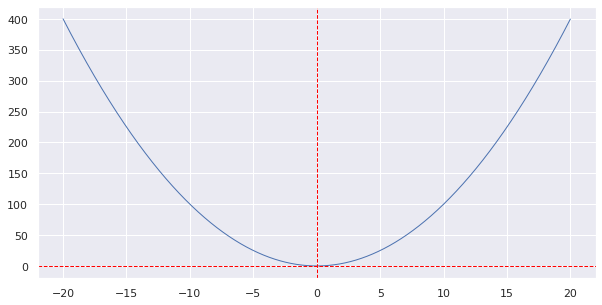

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
# plt.plot(x_vals, y_vals, "blue")
plt.plot(x_vals, y_vals)
plt.grid(True, which="major")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

In [ ]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mae_error

In [ ]:
def MSE(y_predicted, y):
  squared_error = (y_predicted - y) ** 2
  sum_squared_error = np.sum(squared_error)
  mse = sum_squared_error / y.size
  return(mse)

**Mean Squared Logarithmic Error (MSLR)**

* Mean Squared Logarithmic Error
* https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredLogarithmicError

**RMSE**

In [ ]:
tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None
)

$\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Root-Mean-Square Error is the distance, on average, of a data point from the fitted line, measured along a vertical line.
* The **RMSE is directly interpretable in terms of measurement units**, and so is a better measure of goodness of fit than a correlation coefficient. One can compare the RMSE to observed variation in measurements of a typical point. The two should be similar for a reasonable fit. Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable
* https://www.sciencedirect.com/science/article/pii/S096014811831231X
* The **RMSE is more appropriate to represent model performance than the MAE when the error distribution is expected to be Gaussian**.
https://www.geosci-model-dev-discuss.net/7/C473/2014/gmdd-7-C473-2014-supplement.pdf
* When both metrics are calculated, the MAE tends to be much smaller than the RMSE because the RMSE penalizes large errors while the MAE gives the same weight to all errors.
* They summarized that the **RMSE tends to become increasingly larger than the MAE** (but not necessarily in a monotonic fashion) as the distribution of error magnitudes becomes more variable. The RMSE tends to 1 grow larger than the MAE with n2 since its lower limit is fixed at the MAE and its upper 11 limit (n2 · MAE) increases with n2 .
* [Wiki](https://en.m.wikipedia.org/wiki/Root-mean-square_deviation) & [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)

**RMSLE**

* Abzüge für Fehler nach der relativen Größe statt des absoluten Werts vornehmen. Das ist besonders hilfreich, wenn sowohl die vorhergesagten als auch die tatsächlichen Werte sehr groß werden können. Nicht gültig für eine Zielspalte mit negativen Werten

**RMSPE**

##### **MAE (L1) & MAPE**

In [ ]:
loss = 'mae'

$\mathrm{MAE}=\frac{1}{n} \sum_{j=1}^{n}\left|y_{j}-\hat{y}_{j}\right|$

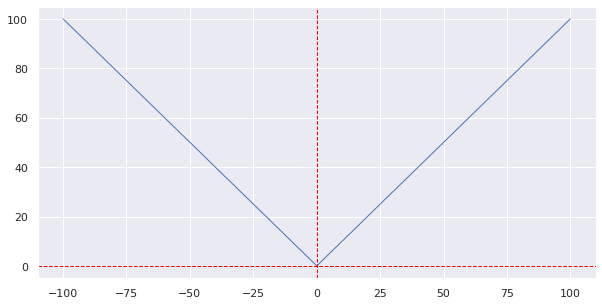

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss
    
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x_vals, y_vals)
plt.grid(True, which="major")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.show()

*If the absolute value is not taken (the signs of the errors are not removed), the average error becomes the Mean Bias Error (MBE) and is usually intended to measure average model bias. MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.*

* Mean Absolute Error (L1 Loss)
* Computes the mean of absolute difference between labels and predictions
* measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
* On some regression problems, the **distribution of the target variable may be mostly Gaussian, but may have outliers**, e.g. large or small values far from the mean value. The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.
* Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Extremwerte als Ausreißer mit geringerem Einfluss auf das Modell ansehen: MAE loss is useful if the training data is corrupted with outliers (i.e. we erroneously receive unrealistically huge negative/positive values in our training environment, but not our testing environment).


In [ ]:
def mae(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing absolute differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += np.abs(prediction - target)
        
    # Calculating mean
    mae_error = (1.0 / samples_num) * accumulated_error
    
    return mae_error

**MSE vs MSE**

One big problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout, which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training (see figure below.)

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mae_vs_mse.PNG)

**Mean Absolute Percentage Error (MAPE)**

In [ ]:
tf.keras.losses.MAPE(
    y_true, y_pred
)

$\mathrm{M}=\frac{1}{n} \sum_{t=1}^{n}\left|\frac{A_{t}-F_{t}}{A_{t}}\right|$

* The mean absolute percentage error (MAPE) is a statistical measure of **how accurate a forecast** system is. 

* It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. Where At is the actual value and Ft is the forecast value.

* The mean absolute percentage error (MAPE) is the most common measure used to forecast error, and works best if there are no extremes to the data (and no zeros).

* https://en.m.wikipedia.org/wiki/Mean_absolute_percentage_error

**Symmetric Mean Absolute Percentage Error (sMAPE)**

In [ ]:
# Import Keras backend
import keras.backend as K

# Define SMAPE loss function
def customLoss(true,predicted):
    epsilon = 0.1
    summ = K.maximum(K.abs(true) + K.abs(predicted) + epsilon, 0.5 + epsilon)
    smape = K.abs(predicted - true) / summ * 2.0
    return smape

# https://medium.com/@mlguy/adding-custom-loss-and-optimizer-in-keras-e255764e1b7d

There are 3 different definitions of sMAPE. 2 of them are below:

$\operatorname{SMAPE}=\frac{100 \%}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(\left|A_{t}\right|+\left|F_{t}\right|\right) / 2}$

* Symmetric mean absolute percentage error (SMAPE or sMAPE) is an accuracy measure based on percentage (or relative) errors. 

* At is the actual value and Ft is the forecast value

* The absolute difference between At and Ft is divided by half the sum of absolute values of the actual value At and the forecast value Ft. The value of this calculation is summed for every fitted point t and divided again by the number of fitted points n.

* Armstrong's original definition is as follows:

$\mathrm{SMAPE (old)}=\frac{1}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(A_{t}+F_{t}\right) / 2}$

* The problem is that it can be negative (if ${\displaystyle A_{t}+F_{t}<0}$) or even undefined (if ${\displaystyle A_{t}+F_{t}=0}$). Therefore the currently accepted version of SMAPE assumes the absolute values in the denominator.

* In contrast to the mean absolute percentage error, SMAPE has both a lower bound and an upper bound. Indeed, the formula above provides a result between 0% and 200%. However a percentage error between 0% and 100% is much easier to interpret. That is the reason why the formula below is often used in practice (i.e. no factor 0.5 in denominator)

* One supposed problem with SMAPE is that it is not symmetric since over- and under-forecasts are not treated equally. This is illustrated by the following example by applying the second SMAPE formula:

  * Over-forecasting: At = 100 and Ft = 110 give SMAPE = 4.76%

  * Under-forecasting: At = 100 and Ft = 90 give SMAPE = 5.26%.

* [Wiki](https://en.m.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error) & [Wiki2](https://wiki2.org/en/Symmetric_mean_absolute_percentage_error) & [other](https://www.brightworkresearch.com/the-problem-with-using-smape-for-forecast-error-measurement/)

**Mean absolute scaled error (MASE)**

* mean absolute scaled error (MASE) is a measure of the accuracy of forecasts.

*  It is the mean absolute error of the forecast values, divided by the mean absolute error of the in-sample one-step naive forecast. It was proposed in 2005.

* The mean absolute scaled error has the following desirable propertie: [Wiki](https://en.wikipedia.org/wiki/Mean_absolute_scaled_error)

##### **Huber**

In [ ]:
loss = tf.keras.losses.Huber(delta=10.0, name='huber_loss')

TLDR: will better find a minimum than L1, but less exposed to outliers than L2. However one has to tune the hyperparameter delta. The larger (3+), the more it is L2, the smaller (1), the more it is L1.

![huber](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/huberloss.jpg)

* For target = 0, the loss increases when the error increases. However, the speed with which it increases depends on this 𝛿 value. In fact, Grover (2019) writes about this as follows: Huber loss approaches MAE when 𝛿 ~ 0 and MSE when 𝛿 ~ ∞ (large numbers.)


![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/320px-Huber_loss.svg.png)

*Huber loss (green, 
δ
=
1) and squared error loss (blue) as a function of 
y
−
f
(
x
)*

$L_{\delta}(y, f(x))=\left\{\begin{array}{ll}
\frac{1}{2}(y-f(x))^{2} & \text { for }|y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.$

When you compare this statement with the benefits and disbenefits of both the MAE and the MSE, you’ll gain some insights about how to adapt this delta parameter:

* **If your dataset contains large outliers**, it’s likely that your model will not be able to predict them correctly at once. In fact, it might take quite some time for it to recognize these, if it can do so at all. This results in large errors between predicted values and actual targets, because they’re outliers. Since MSE squares errors, large outliers will distort your loss value significantly. If outliers are present, you likely don’t want to use MSE. Huber loss will still be useful, but you’ll have to use small values for 𝛿.

* If it does not contain many outliers, it’s likely that it will generate quite accurate predictions from the start – or at least, from some epochs after starting the training process. In this case, you may observe that the errors are very small overall. Then, one can argue, it may be worthwhile to let the largest small errors contribute more significantly to the error than the smaller ones. In this case, MSE is actually useful; hence, with Huber loss, you’ll likely want to use quite large values for 𝛿.

* If you don’t know, you can always start somewhere in between – for example, in the plot above, 𝛿 = 1 represented MAE quite accurately, while 𝛿 = 3 tends to go towards MSE already. What if you used 𝛿 = 1.5 instead? You may benefit from both worlds.

https://www.machinecurve.com/index.php/2019/10/12/using-huber-loss-in-keras/

The biggest problem with using MAE to train neural networks is the constant large gradient, which may cause the minimum point to be missed when the gradient descent is about to end. For MSE, the gradient will decrease as the loss decreases, making the result more accurate.

In this case, Huber loss is very useful. It will fall near the minimum value due to the decreasing gradient. It is more robust to outliers than MSE. Therefore, Huber loss combines the advantages of MSE and MAE. However, the problem with Huber loss is that we may need to constantly adjust the hyperparameters

https://www.programmersought.com/article/86974383768/

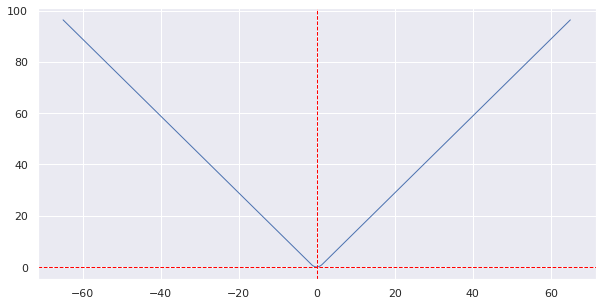

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Huber loss function
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)
    
# Plotting
x_vals = np.arange(-65, 65, 0.01)

# Hyperparameter
delta = 1.5

# Formula
huber_mse = 0.5*np.square(x_vals)
huber_mae = delta * (np.abs(x_vals) - 0.5 * delta)
y_vals = np.where(np.abs(x_vals) <= delta, huber_mse, huber_mae)

sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.grid(True, which="major")
plt.show()

# https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

* Huber Loss (Smooth Mean Absolute Error)

* The Huber loss **combines the best properties of MSE and MAE** (Mean Absolute Error). It is quadratic for smaller errors and is linear otherwise (and similarly for its gradient). It is identified by its delta parameter.

* It's **less sensitive to outliers** in data than the squared error loss. It’s **also differentiable at 0**. It’s basically absolute error, which becomes quadratic when error is small.  How small that error has to be to make it quadratic depends on a hyperparameter 𝛿. 

* Once differentiable.

* **Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞**

* The choice of delta is critical because it determines what you’re willing to consider as an outlier. Residuals larger than delta are minimized with L1 (which is less sensitive to large outliers), while residuals smaller than delta are minimized “appropriately” with L2.

* One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.
Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, **it combines good properties from both MSE and MAE**. 

* However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.

* [Wiki](https://en.m.wikipedia.org/wiki/Huber_loss) * [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber)

##### **Log-Cosh**

TLDR: Similar to MAE, will not be affected by outliers. Log-Cosh has all the points of Huber loss, and no need to set hyperparameters. Compared with Huber, Log-Cosh derivation is more complicated, requires more computation, and is not used much in deep learning. 


In [ ]:
loss = tf.keras.losses.LogCosh()

* Log-cosh is another function used in regression tasks that’s smoother than L2 (is smoothed towards large errors (presumably caused by outliers) so that the final error score isn’t impacted thoroughly.)
* Log-cosh is the logarithm of the hyperbolic cosine of the prediction error. “Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.” (Grover, 2019). Oops, that’s not intuitive but nevertheless quite important – this is the maths behind Logcosh loss:

> $\log \cosh (t)=\sum_{p \in P} \log (\cosh (p-t))$

* Similar to Huber Loss, but twice differentiable everywhere
* [Wiki Hyperbolic Functions](https://en.m.wikipedia.org/wiki/Hyperbolic_functions), [TF Class](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh), [Machinecurve](https://www.machinecurve.com/index.php/2019/10/23/how-to-use-logcosh-with-keras/)

![logcosh](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/logcosh.jpeg)

However, Log-Cosh is second-order differentiable everywhere, which is still very useful in some machine learning models. For example, XGBoost uses Newton's method to find the best advantage. Newton's method requires solving the second derivative (Hessian). Therefore, for machine learning frameworks such as XGBoost, the second order of the loss function is differentiable. But the Log-cosh loss is not perfect, and there are still some problems. For example, if the error is large, the first step and Hessian will become fixed, which leads to the lack of split points in XGBoost.

https://www.programmersought.com/article/86974383768/

##### **Quantile**

TLDR: for Heteroskedastizität, i.e. for risk management when variance changes. Quantile Loss, you can set different quantiles to control the proportion of overestimation and underestimation in loss.

In [ ]:
loss = tfa.losses.PinballLoss(tau=.1)

The usual regression algorithm is to fit the expected or median training data, and the quantile loss function can be used to fit different quantiles of training data by giving different quantiles. As shown below



![sdd](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/quantileloss.jpg)

Set different quantiles to fit different straight lines.



This function is a piecewise functio., γ is the quantile coefficient. y is the true value, f(x) is the predicted value. According to the size of the predicted value and the true value, there are two cases to consider. 

y>f(x) For overestimation, the predicted value is greater than the true value; 

y<f(x) to underestimate, the predicted value is smaller than the real value.

Use different pass coefficients to control the weight of overestimation and underestimation in the entire loss value.

Especially when γ=0.5 When the quantile loss degenerates into the mean absolute error MAE, **MAE can also be regarded as a special case of quantile loss-median loss**. The picture below is taken with different median points [0.25,0.5,0.7] Obtaining different quantile loss function curves can also be seen as MAE at 0.5.

![fgfgf](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/quantileloss2.jpg)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Pinball_Loss_Function.svg/320px-Pinball_Loss_Function.svg.png)

*Pinball-Verlustfunktion mit 
τ
=0,9. Für 
ε
<
0 beträgt der Fehler 
−
0
,
1
ε, für 
ε
≥
0 beträgt er 
0
,
9
ε.*

* Quantile Loss (Pinball Loss)
* estimates conditional “quantile” of a response variable given certain values of predictor variables
* is an extension of MAE (**when quantile is 50th percentile, it’s MAE**)
* Im Gegensatz zur Kleinste-Quadrate-Schätzung, die den Erwartungswert der Zielgröße schätzt, ist die Quantilsregression dazu geeignet, ihre Quantile zu schätzen.
* Fitting models for many percentiles, you can estimate the entire conditional distribution. Often, the answers to important questions are found by modeling percentiles in the tails of the distribution. For that reason **quantile regression provides critical insights in financial risk management & fraud detection**. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Quantilsregression), [TF Class](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/PinballLoss) & [TF Function](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss)

https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/

* project where predictions were subject to high uncertainty. The client required for their decision to be driven by both the predicted machine learning output and a measure of the potential prediction error. The quantile regression loss function solves this and similar problems by replacing a single value prediction by prediction intervals.

* The quantile regression loss function is applied to predict quantiles. A quantile is the value below which a fraction of observations in a group falls. For example, a prediction for quantile 0.9 should over-predict 90% of the times.

* For q equal to 0.5, under-prediction and over-prediction will be penalized by the same factor, and the median is obtained. The larger the value of q, the more over-predictions are penalized compared to under-predictions. For q equal to 0.75, over-predictions will be penalized by a factor of 0.75, and under-predictions by a factor of 0.25. The model will then try to avoid over-predictions approximately three times as hard as under-predictions, and the 0.75 quantile will be obtained.

##### **Poisson Loss**

In [ ]:
tf.keras.losses.poisson(
    y_true, y_pred
)

https://towardsdatascience.com/the-poisson-distribution-103abfddc312

https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/poisson

https://openacttexts.github.io/Loss-Data-Analytics/C-RiskClass.html

### **Classification** (mostly entropy-/ divergence-based or margin-based)

##### **Introduction**

https://en.wikipedia.org/wiki/Loss_functions_for_classification

https://www.machinecurve.com/index.php/2019/10/04/about-loss-and-loss-functions/#loss-functions-for-classification

https://arxiv.org/pdf/1702.05659.pdf

http://cs229.stanford.edu/extra-notes/loss-functions.pdf

##### **Cross-Entropy-based**

**Cross Entropy**

* the cross entropy between two probability distributions p and q **over the same underlying set of events** measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.

https://en.m.wikipedia.org/wiki/Cross_entropy

https://en.m.wikipedia.org/wiki/Cross-entropy_method

Conditional Entropy the conditional entropy (or equivocation)
quantifies the amount of information needed to describe the outcome of a random variable $Y$ given that the value of another
random variable $X$ is known. Here, information is measured in shannons, nats, or hartleys. The entropy of $Y$ conditioned on $X$ is written as $\mathrm{H}(Y \mid X)$

https://en.m.wikipedia.org/wiki/Conditional_entropy

Joint Entropy: In information theory, joint entropy is a measure of the uncertainty associated with a set of variables.

https://en.m.wikipedia.org/wiki/Joint_entropy

**Binary Cross-Entropy**

https://en.m.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression

https://towardsdatascience.com/log-loss-function-math-explained-5b83cd8d9c83

$-(y \log (p)+(1-y) \log (1-p))$

* Cross-Entropy or Log-Loss (Logistic Loss/ negative log-likelihood) 

* It measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

* So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value.  A perfect model would have a log loss of 0.

* Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing. 

* Cross-entropy is the default loss function to use for binary classification problems.

* It is intended for use with binary classification where the target values are in the set {0, 1}.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

* The function requires that the output layer is configured with a single node and a ‘sigmoid‘ activation in order to predict the probability for class 1.

**Sparse Categorical Cross-Entropy (Multiclass)**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss = 'sparse_categorical_crossentropy'

* Cross-entropy is the default loss function to use for multi-class classification problems.

* In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.

* A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.

* For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

* Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.



##### **Divergence-based**

**Kullback-Leibler Divergence (Multiclass)**

In [ ]:
loss = tf.keras.losses.KLDivergence(name='kl_divergence')

https://en.m.wikipedia.org/wiki/Kullback–Leibler_divergence

* Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution. 

* A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution. 

* As such, the KL divergence loss function is more commonly used when using models that learn to **approximate a more complex function than simply multi-class classification**, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. 

* Nevertheless, it can be used for **multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy**.

* Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

* A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

* As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.

* [TF doc](https://www.tensorflow.org/api_docs/python/tf/keras/losses/KLDivergence)

The only divergence that is both an f-divergence and a Bregman divergence is the Kullback–Leibler divergence

https://en.m.wikipedia.org/wiki/Kullback–Leibler_divergence

Use for example as **loss function in variational autoencoder**

https://www.kaggle.com/debanga/statistical-distances

https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

* the Kullback–Leibler divergence (also called relative entropy) is a measure of how one probability distribution is different from a second, reference probability distribution.

* Applications include characterizing the relative (Shannon) entropy in information systems, randomness in continuous time-series, and information gain when comparing statistical models of inference. 

* In contrast to variation of information, **it is a distribution-wise asymmetric measure** and thus **does not qualify as a statistical metric of spread** - it also does not satisfy the triangle inequality.

* In the simple case, a Kullback–Leibler divergence of 0 indicates that the two distributions in question are identical. In simplified terms, it is a measure of surprise, with diverse applications such as applied statistics, fluid mechanics, neuroscience and machine learning.

**Jensen–Shannon divergence**

* It is based on the Kullback–Leibler divergence, with some notable (and useful) differences, including that it is symmetric and it always has a finite value. The square root of the Jensen–Shannon divergence is a metric often referred to as Jensen-Shannon distance
* use in GAN's for example (Goodfellow, Ian J.; Pouget-Abadie, Jean; Mirza, Mehdi; Xu, Bing; Warde-Farley, David; Ozair, Sherjil; Courville, Aaron; Bengio, Yoshua (2014). Generative Adversarial Networks. NIPS. arXiv:1406.2661. Bibcode:2014arXiv1406.2661G)
* https://en.m.wikipedia.org/wiki/Generative_adversarial_network
* https://en.m.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence

**f-Divergence**

* Probabilistic models are often trained by maxi- mum likelihood, which corresponds to minimiz- ing a specific f-divergence between the model and data distribution. 

* In light of recent suc- cesses in training Generative Adversarial Networks, alternative non-likelihood training crite- ria have been proposed.

https://arxiv.org/pdf/1907.11891.pdf

https://arxiv.org/pdf/1905.12888.pdf

https://en.m.wikipedia.org/wiki/F-divergence

The Hellinger distance is a type of f-divergence

https://en.m.wikipedia.org/wiki/Hellinger_distance

https://www.mis.mpg.de/fileadmin/pdf/geoasp_2008_petz.pdf

**Hellinger Distance**

*  the Hellinger distance (closely related to, although different from, the Bhattacharyya distance) is used to **quantify the similarity between two probability distributions**. 

* **It is a type of f-divergence.**

* (?) ist vielleicht sogar eine metric weil es triangle inequality erfüllt.

https://en.m.wikipedia.org/wiki/Hellinger_distance

**Bregman Divergence**

In machine learning, Bregman divergences are used to calculate the bi-tempered logistic loss, performing better than the softmax function with noisy datasets

https://en.m.wikipedia.org/wiki/Bregman_divergence

The squared Euclidean divergence is a Bregman divergence (corresponding to the function x<sup>2</sup>, but not an f-divergence

COST-SENSITIVE CLASSIFICATION BASED ON
BREGMAN DIVERGENCES: https://core.ac.uk/download/pdf/29402554.pdf

https://en.m.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance

**Mahalanobis distance**

* The Mahalanobis distance is a measure of the distance between a point P and a distribution D

* If each of these axes is re-scaled to have unit variance, then the Mahalanobis distance corresponds to standard Euclidean distance in the transformed space. The Mahalanobis distance is thus unitless and scale-invariant, and takes into account the correlations of the data set.

* In statistics, the covariance matrix of the data is sometimes used to define a distance metric called Mahalanobis distance.

* Bregman divergence: **the Mahalanobis distance is an example of a Bregman divergence**

* **Bhattacharyya distance related, for measuring similarity between data sets (and not between a point and a data set** - Mahalanobis distance is a particular case of the Bhattacharyya distance when the standard deviations of the two classes are the same.)

https://en.m.wikipedia.org/wiki/Mahalanobis_distance

* Mahalanobis distance is an effective multivariate distance metric that measures the distance between a point and a distribution. 

* It is an extremely useful metric having, excellent applications **in multivariate anomaly detection, classification on highly imbalanced datasets and one-class classification**. 

![alternativer Text](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mahalanobis.jpg)

* If the dimensions (columns in your dataset) are correlated to one another, which is typically the case in real-world datasets, the Euclidean distance between a point and the center of the points (distribution) can give little or misleading information about how close a point really is to the cluster.

* The two points above are equally distant (Euclidean) from the center. But only one of them (blue) is actually more close to the cluster, even though, technically the Euclidean distance between the two points are equal.

* This is because, Euclidean distance is a distance between two points only. It does not consider how the rest of the points in the dataset vary. So, it cannot be used to really judge how close a point actually is to a distribution of points.

* **What we need here is a more robust distance metric that is an accurate representation of how distant a point is from a distribution.**

So computationally, how is Mahalanobis distance different from Euclidean distance?

1. It transforms the columns into uncorrelated variables
2. Scale the columns to make their variance equal to 1
3. Finally, it calculates the Euclidean distance.

https://www.machinelearningplus.com/statistics/mahalanobis-distance/

The Mahalanobis distance has the following properties:

* It accounts for the fact that the variances in each direction are different.

* It accounts for the covariance between variables.

* It reduces to the familiar Euclidean distance for uncorrelated variables with unit variance.

Distance in standard units

In statistics, we sometimes measure "nearness" or "farness" in terms of the scale of the data. **Often "scale" means "standard deviation."** For univariate data, we say that an observation that is one standard deviation from the mean is closer to the mean than an observation that is three standard deviations away. (You can also specify the distance between two observations by specifying how many standard deviations apart they are.)

**For many distributions, such as the normal distribution, this choice of scale also makes a statement about probability**. Specifically, it is more likely to observe an observation that is about one standard deviation from the mean than it is to observe one that is several standard deviations away. Why? Because the probability density function is higher near the mean and nearly zero as you move many standard deviations away.

**For normally distributed data, you can specify the distance from the mean by computing the so-called z-score**. For a value x, the z-score of x is the quantity z = (x-μ)/σ, where μ is the population mean and σ is the population standard deviation. This is a dimensionless quantity that you can interpret as the number of standard deviations that x is from the mean.



https://blogs.sas.com/content/iml/2012/02/15/what-is-mahalanobis-distance.html

**Bhattacharyya distance**

* In statistics, the Bhattacharyya distance measures the similarity of two probability distributions. It is closely related to the Bhattacharyya coefficient which is a measure of the amount of overlap between two statistical samples or populations. 

* The coefficient can be used to determine the relative closeness of the two samples being considered. It is used to measure the separability of classes in classification and it is considered to be more reliable than the Mahalanobis distance, as the ***Mahalanobis distance is a particular case of the Bhattacharyya distance** when the standard deviations of the two classes are the same. 

* Consequently, when two classes have similar means but different standard deviations, the Mahalanobis distance would tend to zero, whereas the Bhattacharyya distance grows depending on the difference between the standard deviations.

* under certain conditions does not obey the triangle inequality

https://en.m.wikipedia.org/wiki/Bhattacharyya_distance

##### **Margin-based**

Margin-based loss functions are particularly useful for binary classification. In contrast to the distance-based losses, these do not care about the difference between true target and prediction. Instead they penalize predictions based on how well they agree with the sign of the target.

http://juliaml.github.io/LossFunctions.jl/stable/losses/margin/

**Exponential Loss**

**Hinge Loss**

In [ ]:
tf.keras.losses.hinge(y_true, y_pred)

NameError: ignored

[TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/hinge)

**Squared Hinge Loss**

* The hinge loss function has many extensions, often the subject of investigation with SVM models.

* A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

* If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

* As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

[Wiki](https://en.m.wikipedia.org/wiki/Loss_functions_for_classification)

**Square Loss (also margin-based??)**

* While more commonly used in regression, the square loss function can be re-written as a function  and utilized for classification.

https://en.wikipedia.org/wiki/Loss_functions_for_classification#Square_loss

### **Metric (Similarity) Learning**


##### **Similarity Learning vs Regression & Classification**

Similarity learning is an area of supervised machine learning in artificial intelligence. It is closely related to regression and classification, but the goal is to learn a similarity function that measures how similar or related two objects are. It has applications in ranking, in recommendation systems, visual identity tracking, face verification, and speaker verification.

https://en.m.wikipedia.org/wiki/Similarity_learning

**Classification vs Metric Learning**

* **Classification is a “Closed-set” task**. can't add new labels without complete retraining.  The model here is trying to learn separable features in this case — i.e. features, that would allow to assign a label from a predefined set to a given image. The model is trying to find a hyperplane, a rule that separates given classes in space.

* **Metric Learning** is a “Open-set” task. This one means that we do indeed have some predefined set of labels for training, but the model can be applied to any unseen data and it should generalize. In this case the model is trying to solve a metric-learning problem: to learn some sort of similarity metric, and for that it needs to extract discriminative features — features that can be used to distinguish between different people on any two (or more) images. The model is trying not to separate images with a hyperplane, but rather reorganize the input space, pull the similar images together in some form of a cluster while pushing dissimilar images away. 

* This is somewhat reminiscent of clustering problem in Unsupervised Learning — and indeed you can use a model trained on a metric-learning task to create a distance matrix for new data, and than run algorithms like DBSCAN on it to, e.g., cluster images of people’s faces, where each cluster would correspond to a new person.

https://medium.com/@maksym.bekuzarov/losses-explained-contrastive-loss-f8f57fe32246

##### **Ranking, Contrastive & Triplet Loss**

**Ranking & Learning to Rank**

Ranking.. (triplet loss mit similarity learning wird im ranking verwendet, weil es ordinal ist im ggs zu distance learning..)

https://en.m.wikipedia.org/wiki/Ranking_(information_retrieval)

https://en.m.wikipedia.org/wiki/Learning_to_rank

https://en.m.wikipedia.org/wiki/Ranking

https://en.m.wikipedia.org/wiki/Information_retrieval

**Contrastive Loss**

* Contrastive loss was first introduced in 2005 by Yann Le Cunn et al. in this paper and its original application was in Dimensionality Reduction. Now, if you recall, the general goal of a Dimensionality reduction algorithm can be formulated like this:

> Given a sample (a data point) — a D-dimensional vector, transform this sample into a d-dimensional vector, where d ≪ D, while preserving as much information as possible.

* The difference is that Cross-entropy loss is a classification loss which operates on class probabilities produced by the network independently for each sample, and Contrastive loss is a metric learning loss, which operates on the data points produced by network and their positions relative to each other. 

* This is also part of the reason a **cross-entropy loss is not usually used for metric learning tasks** like Face Verification — it doesn’t impose any constraints on the distribution on the model’s inner representation of the given data — i.e. the model can learn any features regardless of whether similar data points would be located closely to each other or not after the transformation.

* for each class/group of similar points (in case of Face Recognition task it would be all the photos of the same person) the **maximum intra-class distance is smaller than the minimum inter-class distance.** 
* It operates on pairs of embeddings received from the model and on the ground-truth similarity flag — a Boolean label, specifying whether these two samples are “similar” or “dissimilar”. So the input must be not one, but 2 images.
* It penalizes “similar” samples for being far from each other in terms of Euclidean distance (although other distance metrics could be used).
* “Dissimilar” samples are penalized by being to close to each other, but in a somewhat different way — Contrastive Loss introduces the concept of “margin” — a minimal distance that dissimilar points need to keep. So it penalizes dissimilar samples for beings closer than the given margin.

**Triplet Loss**

Triplet Loss (a loss function for machine learning algorithms) is often used for learning similarity for the purpose of learning embeddings, like word embeddings and even thought vectors, and metric learning.
https://en.m.wikipedia.org/wiki/Triplet_loss

**Terms**

Ranking Losses are essentialy the ones explained above, and are used in many different aplications with the same formulation or minor variations. However, different names are used for them, which can be confusing. Here I explain why those names are used.

* Ranking loss: This name comes from the information retrieval field, where we want to train models to rank items in an specific order.
* Margin Loss: This name comes from the fact that these losses use a margin to compare samples representations distances.
* Contrastive Loss: Contrastive refers to the fact that these losses are computed contrasting two or more data points representations. This name is often used for * Pairwise Ranking Loss, but I’ve never seen using it in a setup with triplets.
* Triplet Loss: Often used as loss name when triplet training pairs are employed.
* Hinge loss: Also known as max-margin objective. It’s used for training SVMs for classification. It has a similar formulation in the sense that it optimizes until a margin. That’s why this name is sometimes used for Ranking Losses.

**Pairwise Ranking Loss**

dd

**Triplet Ranking Loss**

ddd

https://gombru.github.io/2019/04/03/ranking_loss/

##### **Architectures: Siamese Nets or Triplet Nets**

Siamese and triplet nets are training setups where Pairwise Ranking Loss and Triplet Ranking Loss are used. But those losses can be also used in other setups. 

**Siamese Nets**

Are built by two identical CNNs with shared weights (both CNNs have the same weights). Each one of these nets processes an image and produces a representation. Those representations are compared and a distance between them is computed. Then, a Pairwise Ranking Loss is used to train the network, such that the distance between representations produced by similar images is small, and the distance between representations of dis-similar images is big.

**Triplet Nets**

The idea is similar to a siamese net, but a triplet net has three branches (three CNNs with shared weights). The model is trained by simultaneously giving a positive and a negative image to the corresponding anchor image, and using a Triplet Ranking Loss. That lets the net learn better which images are similar and different to the anchor image.

**Example: Ranking Loss for Multi-Modal Retrieval**

##### **Loss Functions**

[PyTorch] CosineEmbeddingLoss. It’s a Pairwise Ranking Loss that uses cosine distance as the distance metric. Inputs are the features of the pair elements, the label indicating if it’s a positive or a negative pair, and the margin.

[PyTorch] MarginRankingLoss. Similar to the former, but uses euclidian distance.

[PyTorch] TripletMarginLoss. A Triplet Ranking Loss using euclidian distance.

[TensorFlow] contrastive_loss. Pairwise Ranking Loss.

[TensorFlow] triplet_semihard_loss. Triplet loss with semi-hard negative mining.

### **Define Model & Run**

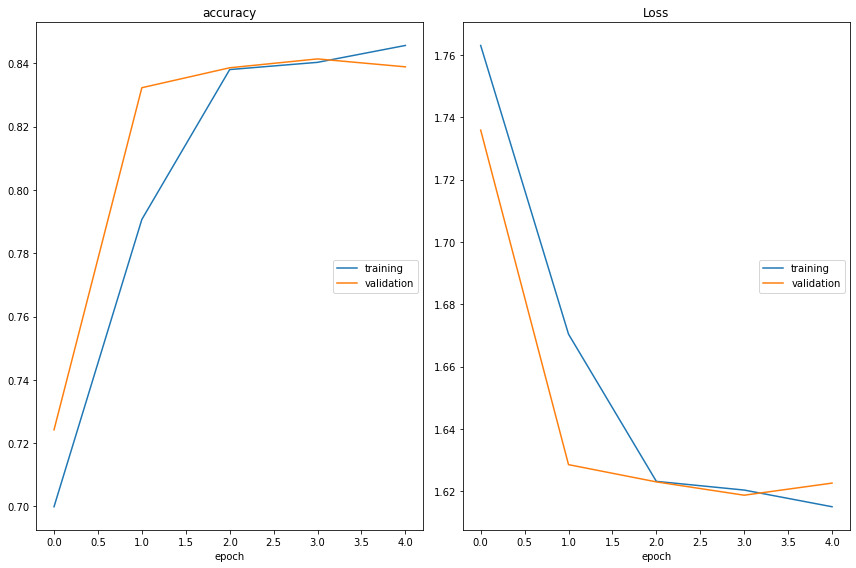

accuracy
	training         	 (min:    0.700, max:    0.846, cur:    0.846)
	validation       	 (min:    0.724, max:    0.841, cur:    0.839)
Loss
	training         	 (min:    1.615, max:    1.763, cur:    1.615)
	validation       	 (min:    1.619, max:    1.736, cur:    1.623)
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6150 - accuracy: 0.8457 - val_loss: 1.6226 - val_accuracy: 0.8389


In [ ]:
# Load & Prepare Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)